In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import mlgrad.af as af
import mlgrad.func as func
import mlgrad.utils as utils
import mlgrad.pca as pca

from sklearn.preprocessing import robust_scale, scale
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine


In [2]:
X0, Y0 = load_wine(return_X_y=True)
X0 = scale(X0)
N = len(X0)
n = X0.shape[1]
print(X0.shape)

(178, 13)


In [3]:
pca_sk = PCA()
U0 = pca_sk.fit_transform(X0)

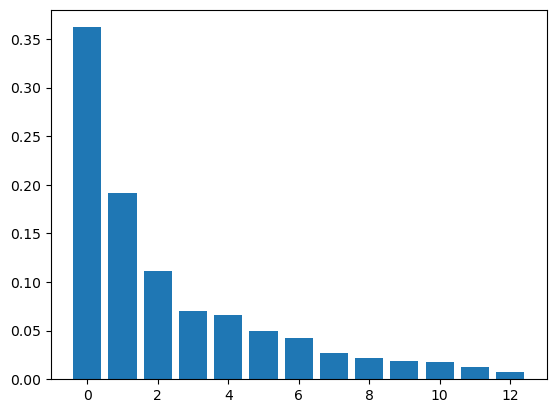

In [4]:
plt.bar(range(n), pca_sk.explained_variance_ratio_)
plt.show()

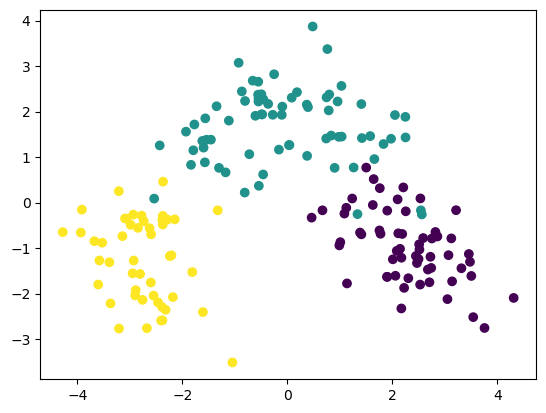

In [5]:
plt.scatter(U0[:,0], U0[:,1], c=Y0)
plt.show()

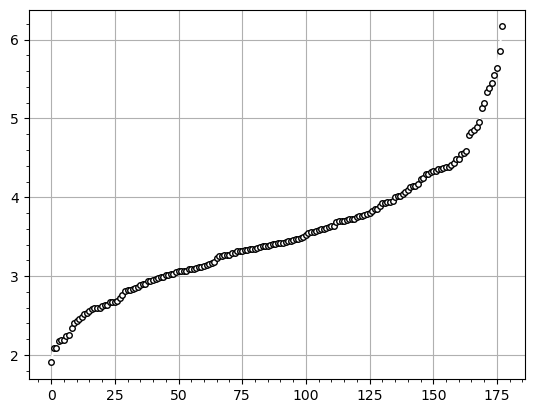

[ 7.84141790e-15  2.44498554e-16 -4.05917497e-15 -7.11041712e-17
 -2.49488320e-17 -1.95536471e-16  9.44313292e-16 -4.17892936e-16
 -1.54059038e-15 -4.12903170e-16  1.39838203e-15  2.12688793e-15
 -6.98567296e-17]


In [6]:
c0 = pca.location(X0)
plt.plot(sorted(pca.distance_center(X0, c0)), marker='o', markersize=4, mfc='w', mec='k', c='w')
# plt.hist(pca.distance_center(X0, c0), bins=40, rwidth=0.9)
plt.grid(1)
plt.minorticks_on()
plt.show()
print(c0)

0.9157303370786517
[ 7.84141790e-15  2.44498554e-16 -4.05917497e-15 -7.11041712e-17
 -2.49488320e-17 -1.95536471e-16  9.44313292e-16 -4.17892936e-16
 -1.54059038e-15 -4.12903170e-16  1.39838203e-15  2.12688793e-15
 -6.98567296e-17]


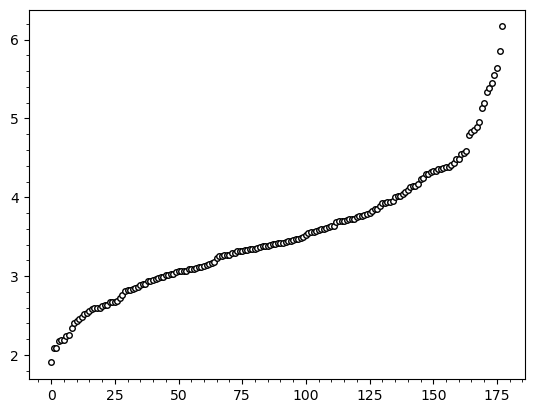

In [7]:
N = len(X0)
alpha = (N - 15) / N
print(alpha)
wma = af.averaging_function("WM", rhofunc=func.Quantile_Sqrt(alpha, 0.001))
c = pca.robust_location(X0, wma)
print(c)
plt.plot(sorted(pca.distance_center(X0, c)), marker='o', markersize=4, mfc='w', mec='k', c='w')
# plt.hist(pca.distance_center(X0, c), bins=30, rwidth=0.9)
plt.minorticks_on()
plt.show()

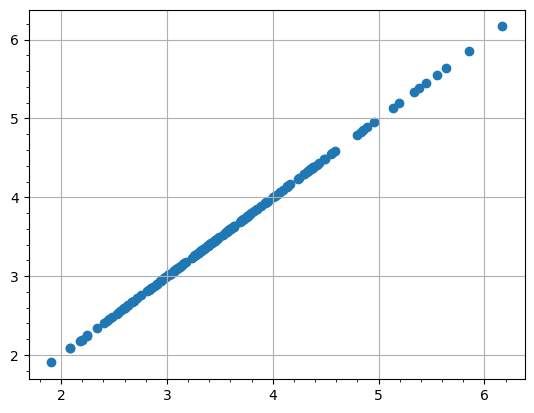

In [8]:
D0 = pca.distance_center(X0, c0)
D1 = pca.distance_center(X0, c)
plt.scatter(D0, D1)
plt.minorticks_on()
plt.grid(1)
plt.show()

In [9]:
X1_0 = X0 - c0
X1 = X0 - c

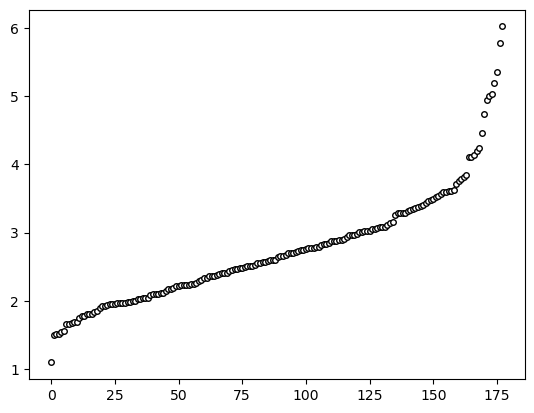

4.705850252967272 [ 0.14433096 -0.24518685 -0.00205004 -0.23932044  0.14199301  0.39466106
  0.42293429 -0.29853301  0.31342962 -0.08861499  0.29671366  0.37616688
  0.28675341]


In [10]:
a1_0, L1_0 = pca.find_pc(X1_0)
# plt.figure(figsize=(10,8))
plt.plot(sorted(pca.distance_line(X1_0, a1_0)), marker='o', markersize=4, mfc='w', mec='k', c='w')
# plt.hist(pca.distance_center(X1_0, a1_0), bins=30, rwidth=0.9)
plt.show()
print(L1_0, a1_0)

0.9157303370786517
4.803633637345203 [ 0.10453585 -0.22836049 -0.03804764 -0.26293883  0.04294761  0.40611167
  0.42664876 -0.24471757  0.34239263 -0.13604068  0.3521268   0.37999417
  0.23135171]


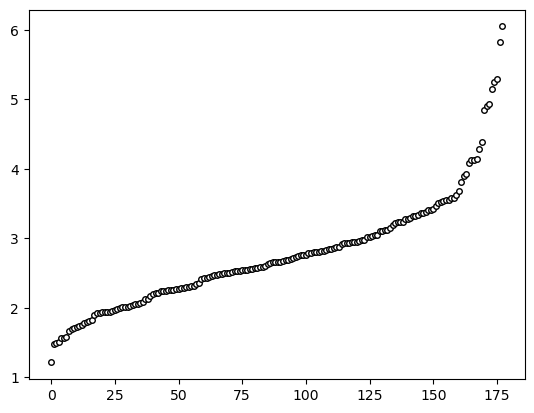

In [11]:
N = len(X0)
alpha = (N - 15) / N
print(alpha)
wma = af.averaging_function("WM", rhofunc=func.Quantile_Sqrt(alpha, 0.001))
a1, L1 = pca.find_robust_pc(X1, wma)
print(L1, a1)
# plt.figure(figsize=(10,8))
plt.plot(sorted(pca.distance_line(X1, a1)), marker='o', markersize=4, mfc='w', mec='k', c='w')
# plt.hist(pca.distance_center(X1, a1), bins=30, rwidth=0.9)
plt.show()
U1 = pca.project_line(X1_0, a1)
U1_0 = pca.project_line(X1, a1_0)

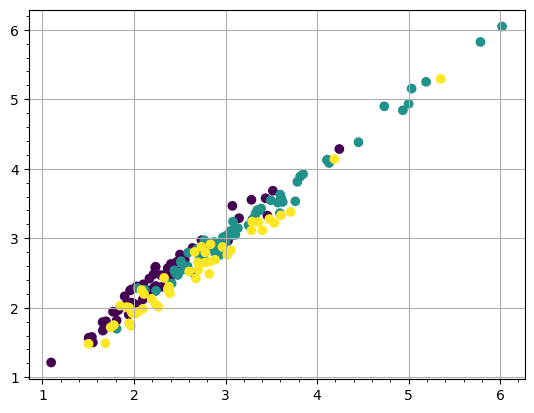

In [12]:
plt.scatter(pca.distance_line(X1_0, a1_0), pca.distance_line(X1, a1), c=Y0)
plt.minorticks_on()
plt.grid(1)
plt.show()

In [13]:
X2_0 = pca.project(X1_0, a1_0)
X2 = pca.project(X1, a1)

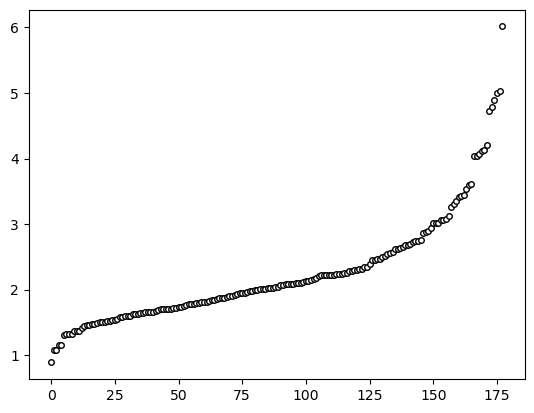

2.496973733419755 [ 0.48365031  0.22493206  0.31607115 -0.01058745  0.29963403  0.06503878
 -0.00336062  0.02878109  0.03930126  0.52999545 -0.27923579 -0.16449679
  0.36490143]


In [14]:
a2_0, L2_0 = pca.find_pc(X2_0)
# plt.figure(figsize=(10,8))
plt.plot(sorted(pca.distance_line(X2_0, a2_0)), marker='o', markersize=4, mfc='w', mec='k', c='w')
# plt.hist(pca.distance_line(X2_0, a2_0), bins=30, rwidth=0.9)
plt.show()
print(L2_0, a2_0)

0.9157303370786517


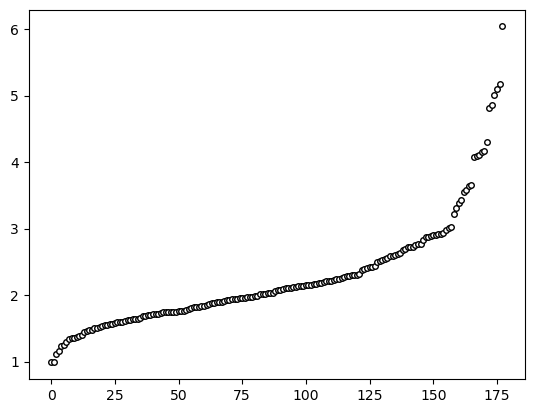

2.4923525421399617 [ 0.48544315  0.22440981  0.2973565  -0.08202062  0.38301843  0.1049107
  0.04792264 -0.01007915  0.06823103  0.46672319 -0.25572818 -0.13635242
  0.390198  ]


In [15]:
N = len(X0)
alpha = (N - 15) / N
print(alpha)
wma = af.averaging_function("WM", rhofunc=func.Quantile_Sqrt(alpha, 0.1))
a2, L2 = pca.find_robust_pc(X2, wma)
# plt.figure(figsize=(10,8))
plt.plot(sorted(pca.distance_line(X2, a2)), marker='o', markersize=4, mfc='w', mec='k', c='w')
# plt.hist(pca.distance_line(X2, a2), bins=30, rwidth=0.9)
plt.show()
print(L2, a2)
U2 = pca.project_line(X2, a2)
U2_0 = pca.project_line(X2_0, a2_0)

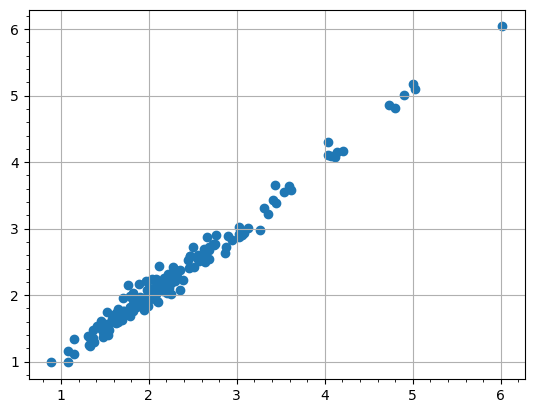

In [16]:
plt.scatter(pca.distance_line(X2_0, a2_0), pca.distance_line(X2, a2))
plt.minorticks_on()
plt.grid(1)
plt.show()

In [17]:
from sklearn.decomposition import PCA

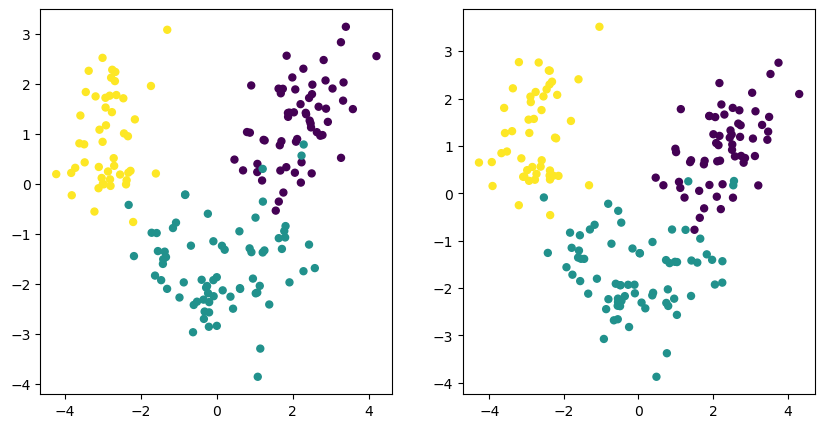

In [18]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(U1, U2, c=Y0, s=25)
plt.subplot(1,2,2)
plt.scatter(U1_0, U2_0, c=Y0, s=25)
plt.show()

In [19]:
As_0, Ls_0, Us_0 = pca.find_pc_all(X1_0)

In [20]:
N = len(X1)
alpha = (N - 10) / N
print(alpha)
wma = af.averaging_function("WM", rhofunc=func.Quantile_Sqrt(alpha, 0.001))
As, Ls, Us = pca.find_robust_pc_all(X1, wma)

0.9438202247191011


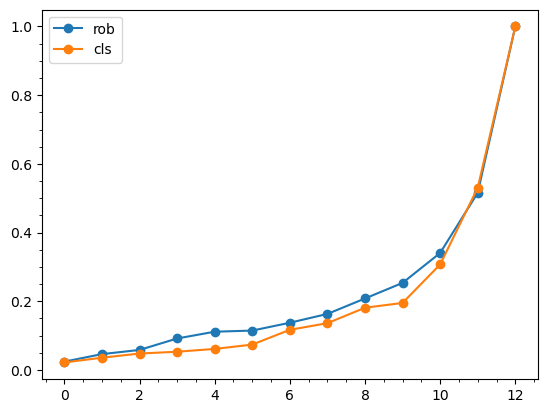

In [21]:
plt.plot(sorted(Ls/Ls.max()), marker='o', label='rob')
plt.plot(sorted(Ls_0/Ls_0.max()), marker='o', label='cls')
plt.legend()
plt.minorticks_on()
plt.show()

In [22]:
Vs = np.array([np.var(U) for U in Us])
Vs_0 = np.array([np.var(U) for U in Us_0])
Vs /= Vs.sum()
Vs_0 /= Vs_0.sum()

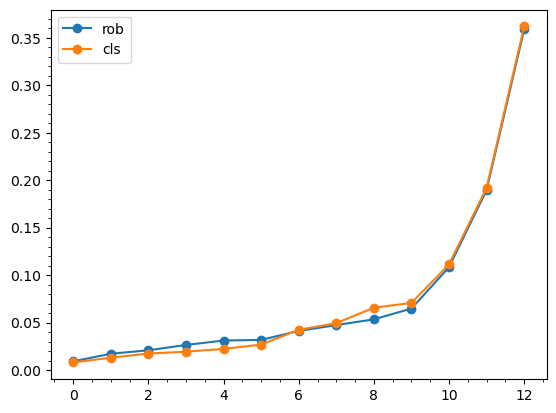

In [23]:
plt.plot(sorted(Vs), marker='o', label='rob')
plt.plot(sorted(Vs_0), marker='o', label='cls')
plt.legend()
plt.minorticks_on()
plt.show()

In [24]:
from mlgrad.pca.location_scatter import robust_scatter_matrix

In [25]:
S = robust_scatter_matrix(X1, wma)
# print(S)

[[ 1.37461809e+00 -2.96524025e-01  6.11042037e-02  1.89478614e-01
  -6.19366013e-02  9.45516711e-02 -4.37062021e-01 -1.33174216e-01
   2.22541721e-01 -6.26744304e-01  2.96275301e-02 -2.05405489e-01
  -5.46175824e-01]
 [-2.96524025e-01  9.10006150e-01 -1.30824413e-01 -5.60302406e-02
   5.61342388e-02 -8.07413696e-02  3.30938685e-01 -8.40433729e-02
  -1.47221348e-01  8.97279181e-02  3.96502151e-01 -3.03443757e-02
   1.41241599e-01]
 [ 6.11042037e-02 -1.30824413e-01  1.26842783e+00 -7.03543869e-01
  -6.20970589e-01 -5.14760703e-02 -1.06992333e-01 -1.92433333e-01
   1.09388184e-02  7.26811854e-02 -3.57971951e-02 -2.55955385e-02
  -4.23793307e-01]
 [ 1.89478614e-01 -5.60302406e-02 -7.03543869e-01  1.38609988e+00
   2.19055906e-01  8.66787243e-02  2.23700138e-01 -5.46291746e-02
  -9.45477520e-02 -2.81937075e-02  1.02717257e-01 -6.96533419e-03
   4.02335514e-01]
 [-6.19366013e-02  5.61342388e-02 -6.20970589e-01  2.19055906e-01
   1.02671507e+00 -1.20311412e-01  3.56427182e-01  4.56233912e-01


In [26]:
L, A = np.linalg.eig(S)
# print(A)
print(L/L.sum())

[0.29843953 0.14448972 0.12022951 0.09559322 0.08593376 0.07120939
 0.06068837 0.04513115 0.00485681 0.00953466 0.01368573 0.02700875
 0.02319939]
